In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
prior_order = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('products.csv')
order_products_train = pd.read_csv('order_products__train.csv')
aisles = pd.read_csv('aisles.csv')
orders = pd.read_csv('orders.csv')
departments = pd.read_csv('departments.csv')

In [3]:
print(prior_order.shape)
prior_order.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
orders.shape

(3421083, 7)

In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
#change NaN to be -1 in order to make a boxplot
orders.fillna(-1,inplace=True)

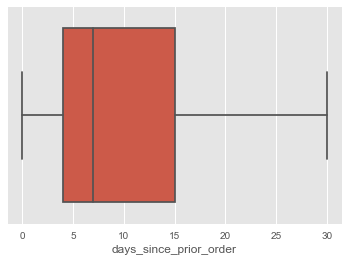

In [87]:
sns.boxplot(x='days_since_prior_order',data=orders,showfliers=True)

The Boxplot above shows that most people order on a range of 4 to 15 days and on average, people re-order after 7 days of purchasing the products they want. In this data, it can be seen that there are not outliers. Thus, there is nothing much to do in terms of handling the outliers.


In [8]:
null_orders = orders[orders.isnull().any(axis=1)]

In [9]:
null_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [10]:
products.shape

(49688, 4)

In [11]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
null_products = products[products.isnull().any(axis=1)]
null_products

,product_id,product_name,aisle_id,department_id


We can see from the above that there is no null values in the products table. 

In [13]:
print(order_products_train.shape)
order_products_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [14]:
null_train = order_products_train[order_products_train.isnull().any(axis=1)]

In [15]:
null_train

,order_id,product_id,add_to_cart_order,reordered


Based on the above analysis, we can see that the 'orders' dataframe has missing values which are "NaN." However, the NaN values are only observed in the column 'days since prior order.' This may indicate either the data is missing or that they have never ordered previously.

In [16]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Overall the data is pretty clean and there are no outliers or missing values. Thus, we can see that most of the data wrangling work are joining the different tables together in order to analyze the data.

# Exploring the Data

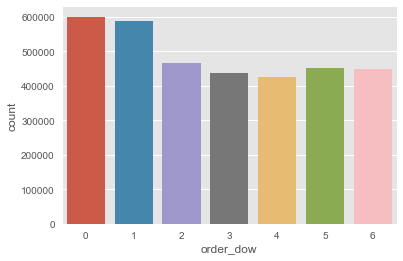

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
#count how many people shop in each day of the week with 0 = sunday
sns.countplot(x='order_dow',data=orders)

we can see that from the chart above, most people order their groceries on Sunday and Monday, and lowest on Thursday.

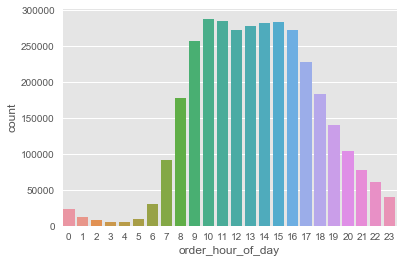

In [18]:
#find out at which time of the day do people usually shop
sns.countplot(x='order_hour_of_day',data=orders)

We can see that most people order their groceries between 10am until 4pm,which is during working hours.

In [19]:
products_ordered = pd.merge(prior_order,products,how='left',on='product_id')

In [20]:
products_ordered.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [21]:
#find out which product is the most popular item
x = products_ordered['product_name'].value_counts()

In [22]:
pd.DataFrame(x.sort_values(ascending=False).head(20))

,product_name
Banana,472565
Bag of Organic Bananas,379450
Organic Strawberries,264683
Organic Baby Spinach,241921
Organic Hass Avocado,213584
Organic Avocado,176815
Large Lemon,152657
Strawberries,142951
Limes,140627
Organic Whole Milk,137905


We can see that the top 20 items include mostly fruits and vegetables.

In [23]:
#findout products are likely to get re-ordered:
reordered_prod = pd.merge(products,prior_order,how='left',on='product_id')
reordered_prod.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,1107.0,7.0,0.0
1,1,Chocolate Sandwich Cookies,61,19,5319.0,3.0,1.0
2,1,Chocolate Sandwich Cookies,61,19,7540.0,4.0,1.0
3,1,Chocolate Sandwich Cookies,61,19,9228.0,2.0,0.0
4,1,Chocolate Sandwich Cookies,61,19,9273.0,30.0,0.0


In [24]:
#find out which products have high reordered rate
reordered = reordered_prod.groupby('product_name')['reordered'].mean().sort_values(ascending=False)
reordered = reordered.head(20)
reordered

product_name
Raw Veggie Wrappers                         0.941176
Serenity Ultimate Extrema Overnight Pads    0.931034
Orange Energy Shots                         0.923077
Chocolate Love Bar                          0.920792
Soy Powder Infant Formula                   0.914286
Simply Sleep Nighttime Sleep Aid            0.911111
Energy Shot, Grape Flavor                   0.909091
Sparking Water                              0.900000
Maca Buttercups                             0.900000
Russian River Valley Reserve Pinot Noir     0.900000
Bars Peanut Butter                          0.895522
Soy Crisps Lightly Salted                   0.893939
Jet Fuel Dark Roast Whole Bean Coffee       0.892857
High Gravity Lager                          0.891892
Benchbreak Chardonnay                       0.891892
Buttery Spray                               0.888889
Almond Orgeat Syrup                         0.888889
Organic Blueberry B Mega                    0.885417
Beer Can                         

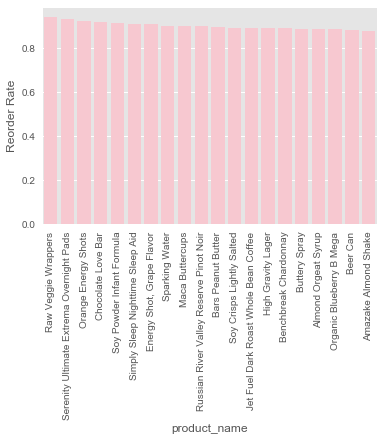

In [25]:
sns.barplot(reordered.index,reordered.values,color='pink')
plt.xticks(rotation='vertical')
plt.ylabel('Reorder Rate')

we can see that from the above graph, the 20 most reodered items. Surprisingly, vegetables and fruits do not make it into the top 20 list.

In [26]:
department_merged_products = pd.merge(products_ordered,departments,how='left',on='department_id')

In [27]:
department_merged_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce
2,2,9327,3,0,Garlic Powder,104,13,pantry
3,2,45918,4,1,Coconut Butter,19,13,pantry
4,2,30035,5,0,Natural Sweetener,17,13,pantry


In [28]:
#figure out what the top 20 aisles are
a = department_merged_products['department'].value_counts()
a_20 = a.sort_values(ascending=False)[0:20]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

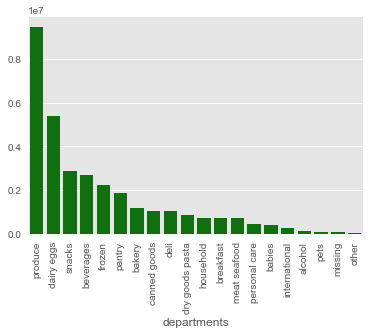

In [29]:
sns.barplot(a_20.index,a_20.values,color='green')
plt.xlabel('departments')
plt.xticks(rotation='vertical')

The top aisles that are most purchased by customers include: produce, dairy eggs,snacks,beverages,etc.

#find out how many items does a person buy based on days since prior order.
#check if people who order after 20 days buy more items than those who do not

In [57]:
"""merge the two data tables: orders and prior order to figure out the correlation 
between the number of items per order and how long it takes one to reorder afterwards.
By doing so, we can figure out if people who order more items take longer time to reorder?
"""
k = pd.merge(orders,prior_order,how='left',on='order_id')

In [85]:
k.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2398795,1,prior,2,3,7,15.0,196.0,1.0,1.0
1,2398795,1,prior,2,3,7,15.0,10258.0,2.0,0.0
2,2398795,1,prior,2,3,7,15.0,12427.0,3.0,1.0
3,2398795,1,prior,2,3,7,15.0,13176.0,4.0,0.0
4,2398795,1,prior,2,3,7,15.0,26088.0,5.0,1.0


In [74]:
k1 = k.groupby('order_id')['add_to_cart_order'].max().reset_index()
k2 = k.groupby('order_id')['days_since_prior_order'].mean().reset_index()

In [75]:
k3 = pd.merge(k1,k2,on='order_id')

In [76]:
k3.head()

,order_id,add_to_cart_order,days_since_prior_order
0,1,NaN,9.0
1,2,9.0,8.0
2,3,8.0,12.0
3,4,13.0,7.0
4,5,26.0,9.0


In [78]:
k3.dropna().head()

,order_id,add_to_cart_order,days_since_prior_order
1,2,9.0,8.0
2,3,8.0,12.0
3,4,13.0,7.0
4,5,26.0,9.0
5,6,3.0,30.0


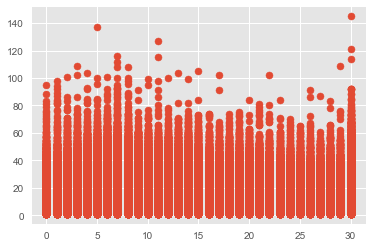

In [83]:
plt.scatter(x='days_since_prior_order',y='add_to_cart_order',data=k3)

Based on the graph above, it can be seen that there is no clear correlation between the number of days it takes someone to do grocery shopping and the number of distinct items purchased. 